## Predicting the chances of admission of students into foreign university for an admission counselling company using Linear Regression

Jamboree is India's leading institute for study abroad test prep and admission counselling. Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Businness Problem

Analysis will help Jamboree in understanding what factors are important in graduate admission and how these
factors are interrelated among themseleves. It will also help predict one's chances of admission gives the rest of
the varibles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge , ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


In [2]:
df = pd.read_excel("Jamboree_Admission.xlsx")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Some details about the columns

- Serial No.: This column represents the unique row identier for each applicant in the dataset.
- GRE Scores: This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.
- University Rating: This column indicates the rating or reputation of the university that the applicants are associated with.
  - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- SOP: This column represents the strength of the applicant's statement of purpose,rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- LOR: This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.
- Research: This column indicates whether the applicant has research experience (1) or not (0).
- Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.


These columns provide relevant information about the applicants' academic qualications, test scores, university ratings, and other factors that may inuence their chances of admission.



### Basic structure and Characteristics of data

In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No null values

### **Observations**

*   Data contain 500 rows of record
*   Data contain 9 Columns.
* Data does not contain any column with object dtype.
* Dataset doesn't contain any null values

There are unnecessary spaces and full stops presents in the name of columns. So need to rename the columns

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.rename(columns = {'GRE Score':'gre_score' , 'TOEFL Score':'toefl_score' , 'University Rating':'university_rating',
                     'SOP':'sop' , 'LOR ':'lor' , 'CGPA':'cgpa', 'Research':'research' ,
                     'Chance of Admit ':'chance_of_admit'},inplace = True)

Serial no. columns is not important for analysis so we will drop it.

In [10]:
df.drop('Serial No.',axis=1,inplace=True)

----

# Univarate analysis

### GRE Score

In [11]:
df['gre_score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: gre_score, dtype: float64

<Axes: xlabel='gre_score'>

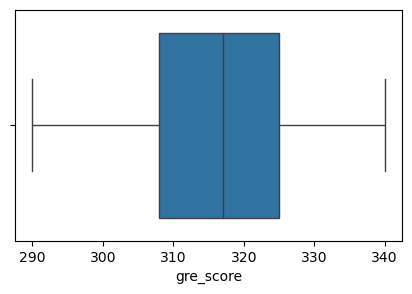

In [12]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['gre_score'])

There are **no outlier** and the mean of the GRE Score is **316**

### TOEFL Score

In [13]:
display(df['toefl_score'].describe())

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: toefl_score, dtype: float64

<Axes: xlabel='toefl_score'>

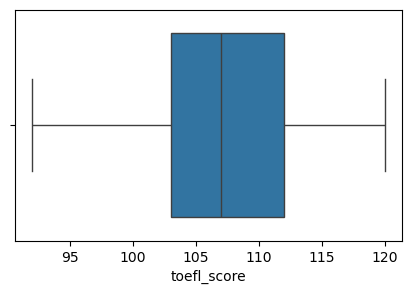

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='toefl_score')

There are **no outlier** and the mean of the TOEFL is **107**

### University Rating

In [15]:
df['university_rating'].value_counts()/500*100

university_rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: count, dtype: float64

In [16]:
round(32.4+25.2)

58

<Axes: xlabel='university_rating', ylabel='count'>

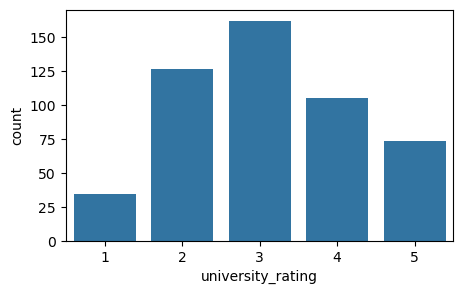

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='university_rating')

There are **58%** of students comes from colleges which have rating 3 or 2.

In [18]:
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

### Statement of Purpose (SOP) and Letter of Recommendation Strength (LOR)

In [19]:
df['sop'].describe()

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: sop, dtype: float64

In [20]:
df['sop'].value_counts()/500*100

sop
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: count, dtype: float64

<Axes: xlabel='sop', ylabel='count'>

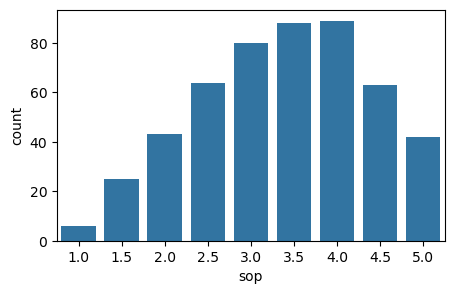

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='sop')

In [22]:
df['lor'].describe()
df['lor'].value_counts()/500*100

lor
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: count, dtype: float64

<Axes: xlabel='lor', ylabel='count'>

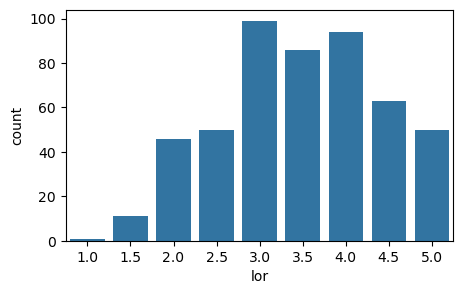

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='lor')

### CGPA Score

In [24]:
df.cgpa.describe()

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: cgpa, dtype: float64

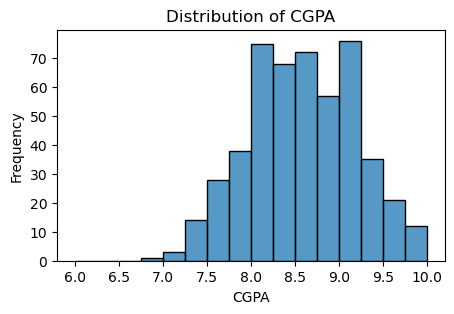

In [25]:
plt.figure(figsize=(5,3))
bins = np.arange(6, df['cgpa'].max() + 0.25, 0.25)
sns.histplot(df['cgpa'], bins=bins, edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

Research

In [26]:
df.research.value_counts().reset_index()

,research,count
0,1,280
1,0,220


### Chance of admit

In [27]:
df['chance_of_admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: chance_of_admit, dtype: float64

<Axes: xlabel='chance_of_admit', ylabel='Count'>

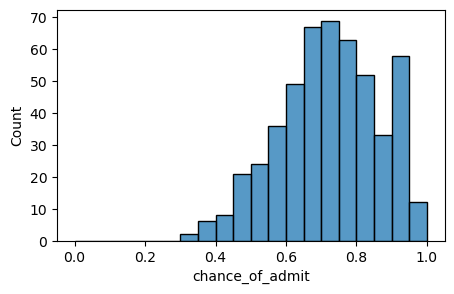

In [28]:
plt.figure(figsize=(5,3))
bins = np.arange(0, df['chance_of_admit'].max() + 0.05,0.05)
sns.histplot(data=df,x='chance_of_admit',bins=bins)

<Axes: xlabel='chance_of_admit'>

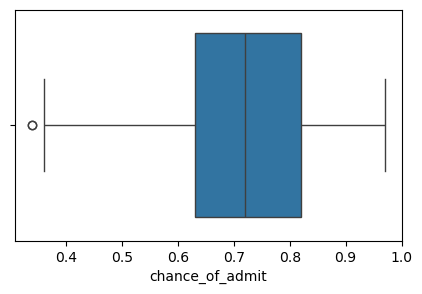

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(x = df['chance_of_admit'])

# Multivariate Analysis

### Visual representation of the relation of Chance of Admit to columns

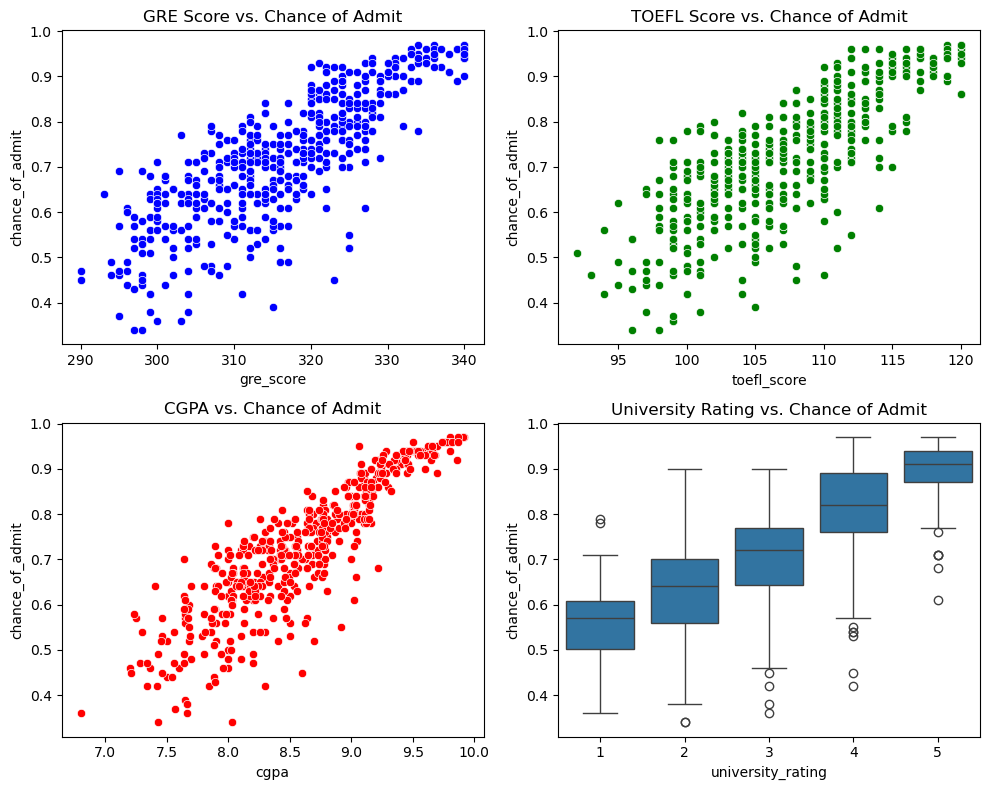

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of GRE Score vs. Chance of Admit
sns.scatterplot(ax=axes[0, 0], data=df, x='gre_score', y='chance_of_admit',c='b')
axes[0, 0].set_title('GRE Score vs. Chance of Admit')

# Scatter plot of TOEFL Score vs. Chance of Admit
sns.scatterplot(ax=axes[0, 1], data=df, x='toefl_score', y='chance_of_admit',c='g')
axes[0, 1].set_title('TOEFL Score vs. Chance of Admit')

# Scatter plot of CGPA vs. Chance of Admit
sns.scatterplot(ax=axes[1, 0], data=df, x='cgpa', y='chance_of_admit',c='r')
axes[1, 0].set_title('CGPA vs. Chance of Admit')

# Boxplot of University Rating vs. Chance of Admit
sns.boxplot(ax=axes[1, 1], data=df, x='university_rating', y='chance_of_admit')
axes[1, 1].set_title('University Rating vs. Chance of Admit')

plt.tight_layout()
plt.show()

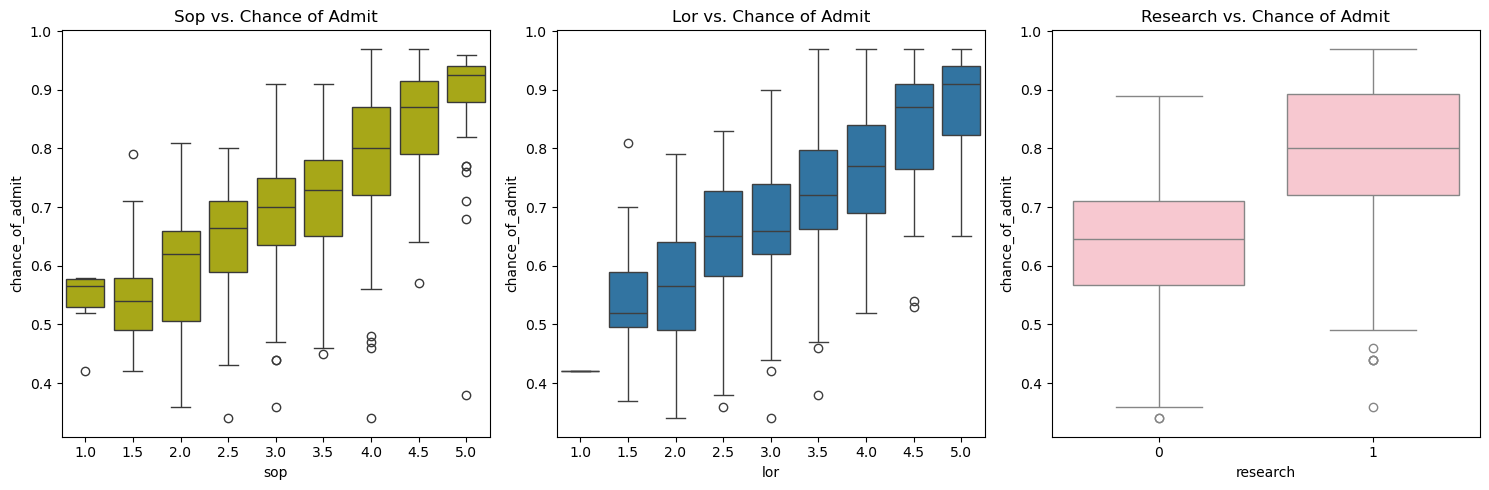

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=df, x='sop', y='chance_of_admit',color='y')
axes[0].set_title('Sop vs. Chance of Admit')

sns.boxplot(ax=axes[1], data=df, x='lor', y='chance_of_admit')
axes[1].set_title('Lor vs. Chance of Admit')

sns.boxplot(ax=axes[2], data=df, x='research', y='chance_of_admit',color='pink')
axes[2].set_title('Research vs. Chance of Admit')

plt.tight_layout()
plt.show()

The relation between chance of admit and GRE, TOEFL, CGPA, University Rating, SOP, LOR and Research is linear as the value of the the GRE, TOEFL, CGPA, University Rating, SOP, LOR and Research increases the chance of Admit also increases

<Axes: >

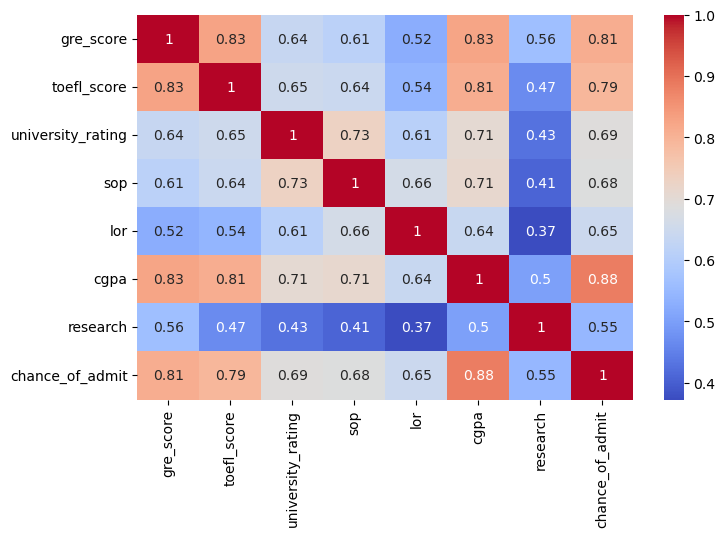

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## **Insights**

- GRE & TOEFL Scores: Both have a strong positive correlation with the chance of admit (0.81 and 0.79, respectively).
- CGPA: Strongest correlation with chance of admit (0.88), highlighting its importance for admission chances.
- University Rating & SOP: Both show moderate positive correlations with chance of admit (0.69 and 0.68), indicating their relevance.
- Research: Least correlated with chance of admit (0.55), suggesting it has a smaller impact compared to other factors.


## Data Preprocessing

In [33]:
df[df.duplicated()]

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit


There are no duplicates in the data

In [34]:
df.isnull().sum()

gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64

In [35]:
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

## Data Modeling

In [36]:
Y_col = df["chance_of_admit"]
X_col = df.drop(columns="chance_of_admit")

###  Spliting the data into training and testing sets

In [37]:
X_train_val , X_test , y_train_val , y_test = train_test_split(X_col , Y_col , test_size = 0.2 ,random_state=2)

### Spliting the train set to get validation set

In [38]:
X_train , X_val , y_train , y_val  = train_test_split(X_train_val , y_train_val , test_size = 0.25 , random_state = 2)

### Scaling the data

In [39]:
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

### Scaling the training data

In [40]:
X_train = pd.DataFrame(feature_scaler.fit_transform(X_train),columns = X_train.columns)
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
X_train.head(3)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,0.952058,0.299085,-0.069103,0.145416,0.532527,0.323069,0.880425
1,-1.850772,-1.972449,-0.932885,-0.367817,-1.633683,-1.675129,0.880425
2,-1.941186,-1.323439,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815


### Scaling Validation data

In [41]:
X_val = pd.DataFrame(feature_scaler.transform(X_val),columns = X_val.columns)
y_val = target_scaler.transform(y_val.values.reshape(-1,1))
X_val.head(3)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,1.313714,1.434853,1.658462,1.685115,1.615631,1.314046,0.880425
1,0.590403,-0.512177,-0.069103,0.658649,0.532527,-0.213033,0.880425
2,-0.856219,-0.349925,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815


### Scaling the test data

In [42]:
X_test = pd.DataFrame(feature_scaler.transform(X_test),columns = X_test.columns)
y_test = target_scaler.transform(y_test.values.reshape(-1,1))
X_test.head(3)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,1.494541,1.759358,1.658462,1.685115,1.615631,1.265309,0.880425
1,-0.494564,-0.836682,-0.069103,1.171882,0.532527,0.111877,0.880425
2,-1.037047,-0.512177,-0.932885,-0.881050,-2.175236,-1.268991,-1.135815


### Fitting with data with the Model

In [43]:
lir_model = LinearRegression()
lir_model.fit(X_train,y_train)

LinearRegression()

In [44]:
lir_model.coef_

array([[ 0.18662198,  0.13828711, -0.01512607,  0.04049842,  0.13615616,
         0.48144963,  0.07430303]])

In [45]:
lir_model.intercept_

array([3.71172818e-16])

### R^2 Score for train data

In [46]:
lir_model.score(X_train,y_train)

0.8384571071533284

### R^2 Score for Validation data

In [47]:
lir_model.score(X_val,y_val)

0.7869929436388757

### R^2 Score for test data

In [48]:
lir_model.score(X_test,y_test)

0.787510797654214

### Mean Squared Error

In [49]:
np.sum(( y_train - lir_model.predict(X_train))**2) / len(y_train)

0.16154289284667164

### Stats Model

In [50]:
X_stats_model = sm.add_constant(X_train)
stats_model = sm.OLS(y_train,X_stats_model)
stats_result = stats_model.fit()
X_stats_model.head()

,const,gre_score,toefl_score,university_rating,sop,lor,cgpa,research
0,1.0,0.952058,0.299085,-0.069103,0.145416,0.532527,0.323069,0.880425
1,1.0,-1.850772,-1.972449,-0.932885,-0.367817,-1.633683,-1.675129,0.880425
2,1.0,-1.941186,-1.323439,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815
3,1.0,-0.404150,-1.161187,-1.796668,-0.367817,-0.550578,-0.066823,0.880425
4,1.0,1.223300,0.948095,1.658462,1.685115,0.532527,1.200327,0.880425


#### Summary

In [51]:
print(stats_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          1.33e-111
Time:                        12:53:36   Log-Likelihood:                -152.23
No. Observations:                 300   AIC:                             320.5
Df Residuals:                     292   BIC:                             350.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -5.69e-16      0.02

In [52]:
#Droping SOP Column as p-value > 0.05
#Droping LOR column as p-value > 0.05

new_xtrain = X_stats_model.drop(["sop","university_rating"],axis=1)
new_xtrain.head()

,const,gre_score,toefl_score,lor,cgpa,research
0,1.0,0.952058,0.299085,0.532527,0.323069,0.880425
1,1.0,-1.850772,-1.972449,-1.633683,-1.675129,0.880425
2,1.0,-1.941186,-1.323439,-0.550578,-1.496428,-1.135815
3,1.0,-0.404150,-1.161187,-0.550578,-0.066823,0.880425
4,1.0,1.223300,0.948095,0.532527,1.200327,0.880425


In [53]:
stats_model2 = sm.OLS(y_train,new_xtrain)
stats_result = stats_model2.fit()
print(stats_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     303.8
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          7.51e-114
Time:                        12:53:37   Log-Likelihood:                -152.80
No. Observations:                 300   AIC:                             317.6
Df Residuals:                     294   BIC:                             339.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.69e-16      0.023  -2.42e-14      

# Assumptions of Linear Regression?
---

###

### 1. **No Multicollinearity**
Independent variables should not be highly correlated with each other. High multicollinearity can distort the estimation of coefficients.  
**How to Test:**  
- Calculate the Variance Inflation Factor (VIF).  
**VIF Formula:**  
$$
VIF = \frac{1}{1 - R^2}
$$
Where \( R^2 \) is the coefficient of determination of the regression model predicting a feature using other features.  
- A VIF > 5 or 10 indicates high multicollinearity.

---

### 2. **Normality of Residuals & Mean of residuals close to 0**
- Mean of Residuals should be close to zero.


Residuals (errors) should follow a normal distribution. This is important for hypothesis testing and confidence intervals.  
**How to Test:**  
- Use a Q-Q plot (quantile-quantile plot).  


### 3. **Linear relationship between independent & dependent variables.**

---

### 4. **No Heteroskedasticity**
The variance of residuals should remain constant across all levels of the independent variables.  
**How to Test:**  
- Perform Goldfeld Quandt test.


### MultiCollinearity Check

#### Variance Inflation Factor

In [54]:
vif = pd.DataFrame()
vif["Features"] = new_xtrain.columns
vif["VIF_SCORE"] = [variance_inflation_factor(new_xtrain.values,i) for i in range(new_xtrain.shape[1])]

In [55]:
vif

,Features,VIF_SCORE
0,const,1.000000
1,gre_score,4.092586
2,toefl_score,4.058964
3,lor,1.681572
4,cgpa,4.482544
5,research,1.430166


- Since the Variance Inflation Factor (VIF) scores for all features are below 5, we can conclude that there is minimal multicollinearity or no multicollinearity among the features.

## Residuals Mean & Normality of Residuals:

- The mean of residuals measures the average error between actual and predicted values in a regression model.
- A mean close to zero indicates balanced predictions, with no systematic overprediction or underprediction.
- If the mean deviates significantly from zero, it suggests the model may be biased or poorly calibrated.

### Training data

In [56]:
stats_model = sm.OLS(y_train,new_xtrain)
model_fit = stats_model.fit()
y_predict = model_fit.predict(new_xtrain)

In [57]:
train_residuals = (y_train.reshape(-1) - y_predict.values)

train_residuals.mean()

9.399888275159659e-16

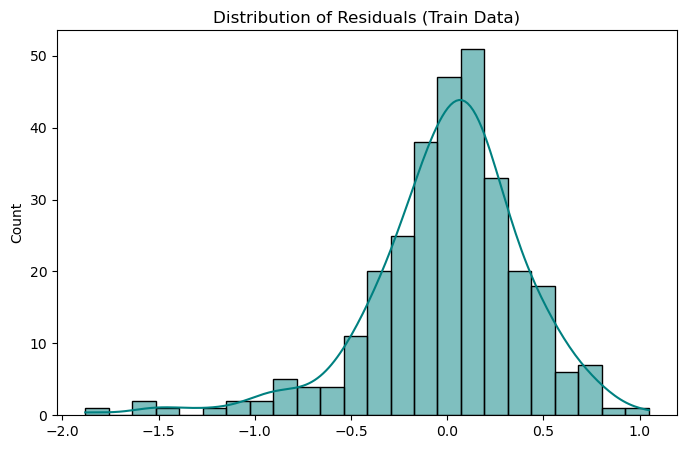

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(train_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Train Data)")
plt.show()

### Validation Data

In [64]:
X_val.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research'],
      dtype='object')

In [59]:
X_val_sm = sm.add_constant(X_val)

In [65]:
y_predict_val = model_fit.predict(X_val_sm.drop(["university_rating","sop"], axis = 1 ))

In [66]:
val_residuals = (y_val.reshape(-1) - y_predict_val.values)
val_residuals.mean()

0.023169113800557153

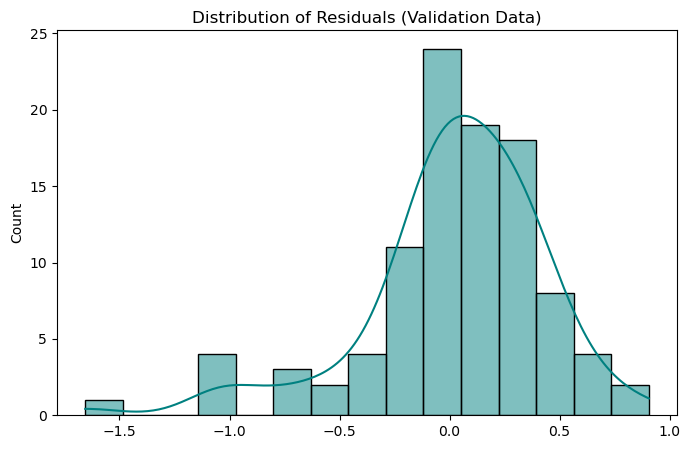

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(val_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Validation Data)")
plt.show()

### Test Data

In [71]:
X_test_sm = sm.add_constant(X_test)
y_test_val = model_fit.predict(X_test_sm.drop(["university_rating","sop"], axis = 1 ))
test_residuals = (y_test.reshape(-1) - y_test_val.values)
test_residuals.mean()

-0.037139323888725935

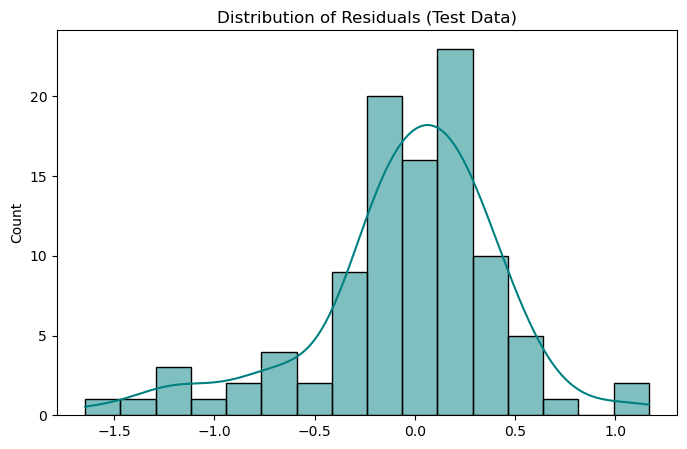

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(test_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Test Data)")
plt.show()

## Linear relationship between independent & dependent variables.

- Linearity assumes a consistent relationship between independent variables and the dependent variable in a regression model.
- Residual plots help assess linearity; ideally, residuals should scatter randomly around zero, showing no patterns.
- Patterns like curved shapes, U-shapes, or funnel spreads suggest violations of the linearity assumption.
- Addressing these issues may involve transformations, adding polynomial terms, or exploring nonlinear models.

### Relationship Between Dependent and Independent Variable ( Regression Plot )

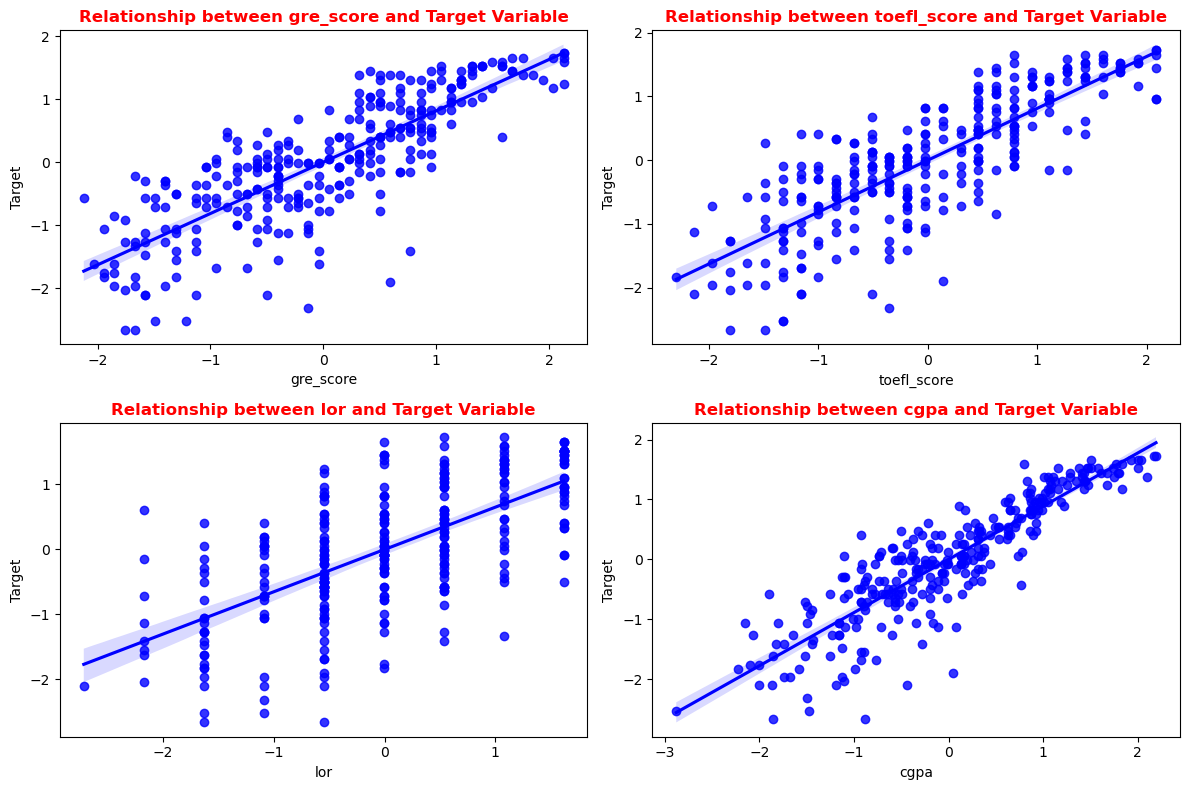

In [86]:
plt.figure(figsize=(12,8))
i = 1


for col in new_xtrain.columns[1:5]:
    plt.subplot(2,2,i)
    sns.regplot(x = new_xtrain[col] , y = y_train.reshape(-1) , color = "b")
    plt.tight_layout
    plt.title(f"Relationship between {col} and Target Variable",fontweight='bold',color='red')
    plt.ylabel('Target')
    i = i+1


plt.tight_layout()
plt.show()

### Pearson Correlation Check Between Independent and Dependent Variable

In [89]:
for i in new_xtrain.columns:
  if (i != "const") :
    stat , pvalue = pearsonr(new_xtrain[i], y_train.reshape(-1))
    if pvalue <= 0.05:
      print(f"{i} is Linearly correlated with the Target variable , P-Value = {pvalue}")
      print("-" * 80)
    else:
      print(f"{i} is NOT Linearly correlated with the Target variable , P-Value = {pvalue}")
      print("-" * 80)
      print("\n")


gre_score is Linearly correlated with the Target variable , P-Value = 1.2429548960827987e-72
--------------------------------------------------------------------------------
toefl_score is Linearly correlated with the Target variable , P-Value = 2.2961740439665804e-72
--------------------------------------------------------------------------------
lor is Linearly correlated with the Target variable , P-Value = 1.6409382350529593e-37
--------------------------------------------------------------------------------
cgpa is Linearly correlated with the Target variable , P-Value = 9.117753627641115e-103
--------------------------------------------------------------------------------
research is Linearly correlated with the Target variable , P-Value = 4.784288448931641e-23
--------------------------------------------------------------------------------


## No Heteroscedasticity Check

- Homoscedasticity (No Heteroscedasticity) assumes the variance of residuals is constant across all levels of independent variables.
- Violations indicate inconsistent error variability, which can lead to unreliable regression estimates.
- Residual plots, scatterplots and Goldfeld-Quandt tests are common ways to check for homoscedasticity.
- Maintaining homoscedasticity ensures accurate and efficient regression results; addressing violations may involve data transformation or model adjustments.

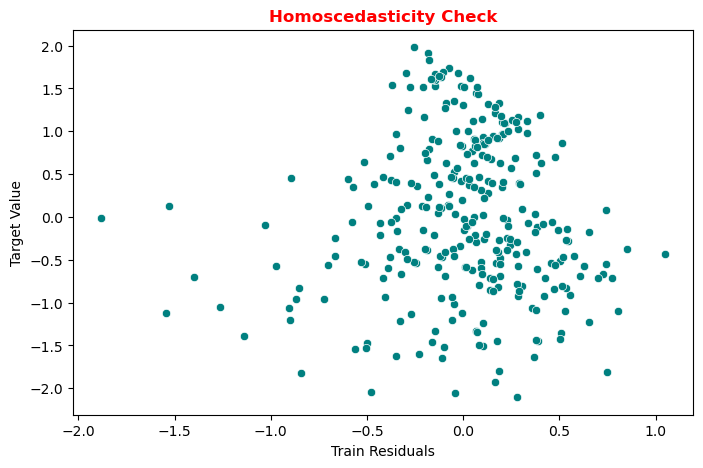

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = train_residuals , y = y_predict.values.reshape(-1) , color ="Teal"  )
plt.title("Homoscedasticity Check", fontweight='bold',color='red')
plt.xlabel("Train Residuals")
plt.ylabel('Target Value')
plt.show()

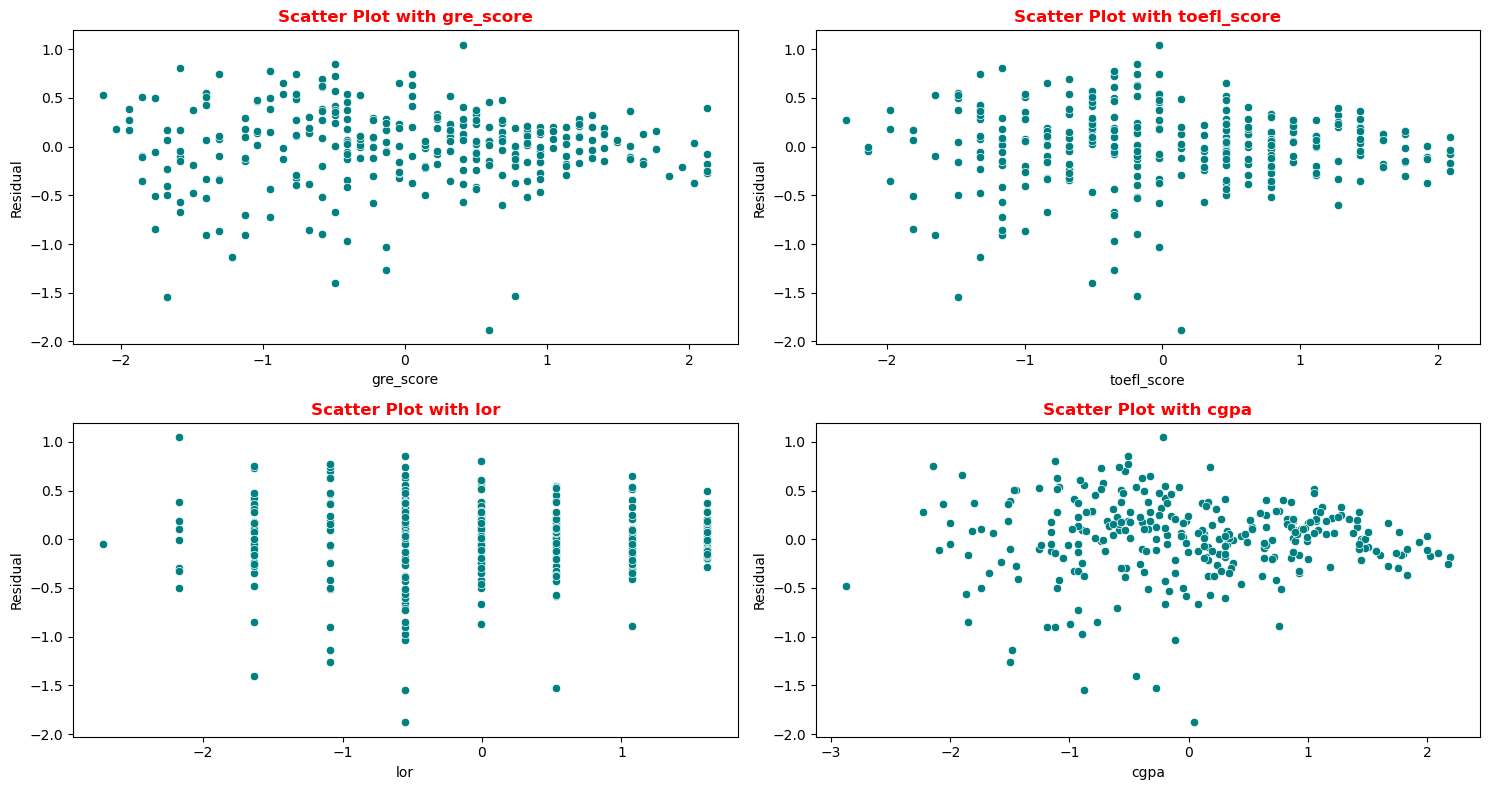

In [94]:
plt.figure(figsize=(15,8))
i=1
for col in new_xtrain.columns[1:5]:
  if col != ("const") and col!= ("Research"):
    plt.subplot(2,2,i)
    sns.scatterplot(x=new_xtrain[col].values.reshape(-1,), y=train_residuals.reshape(-1,),color='teal')
    plt.title(f'Scatter Plot with {col}',fontweight='bold',color='red')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
plt.show();

### Goldfel-Quandt Test for Homoscedasticity

- Null and Alternate Hypothesis of Goldfeld-Quandt Test

    - Null Hypothesis: Heteroscedasticity is not present.
    - Alternate Hypothesis: Heteroscedasticity is present.

In [95]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(y_train, new_xtrain)
lzip(name, test)

[('F statistic', 0.8326763968871292), ('p-value', 0.8634588797428867)]

- As pvalue > 0.05 We failed to reject Null Hypothesis.

**There is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.**


## Normality of residuals
- Normality assumes that residuals in a statistical model follow a normal distribution, ensuring errors are random, unbiased, and consistent in variability.
- This assumption is critical for valid hypothesis testing, confidence intervals, and the application of certain statistical tests.
- Normality can be assessed using a residual histogram (looking for a bell-shaped curve) and a Q-Q plot (checking if points align closely with the diagonal line).

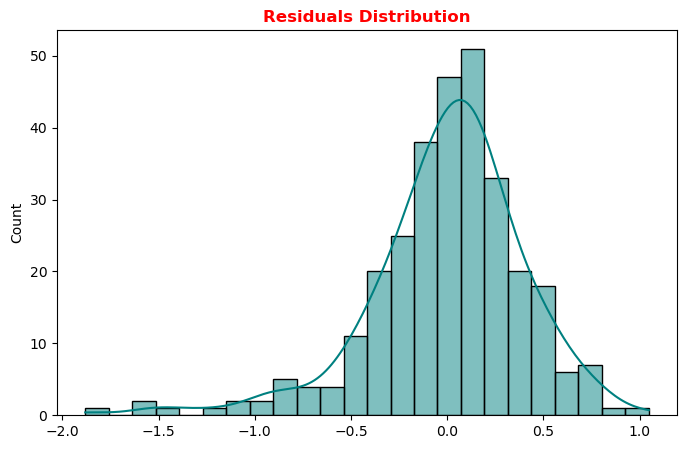

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(train_residuals, kde= True,color='teal')
plt.title('Residuals Distribution',fontweight='bold',color='red')
plt.show()

<Figure size 800x500 with 0 Axes>

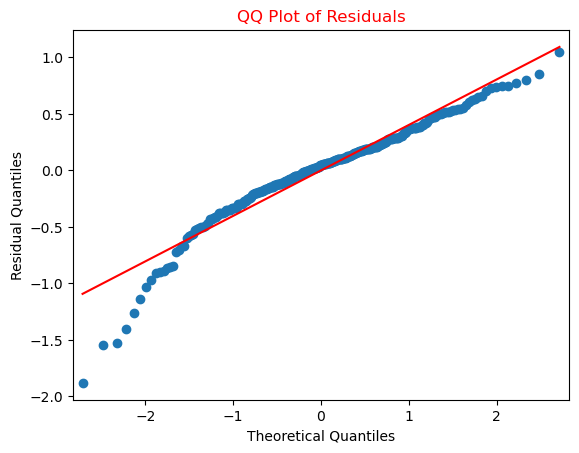

In [97]:
plt.figure(figsize=(8,5))

sm.qqplot(train_residuals,line='s')
plt.title('QQ Plot of Residuals',color='Red')
plt.ylabel('Residual Quantiles')
plt.show()

- The Residuals are a little left skewed as we can check over the Distribution

# L1 (Lasso) And L2 (Ridge) Reguralization :

- Lasso Regression: Uses L1 regularization to penalize the absolute values of coefficients, shrinking some to exactly zero, which helps with feature selection in high-dimensional datasets.
- Ridge Regression: Uses L2 regularization to penalize the squared values of coefficients, reducing the influence of less important features and addressing multicollinearity effectively.

## Lasso Regression ( L1 Reguralization )

In [100]:
x_train = new_xtrain.drop("const", axis = 1)
lasso_m = Lasso(alpha = 0.001)
lasso_m.fit(x_train,y_train)

Lasso(alpha=0.001)

In [101]:
train_predict = lasso_m.predict(x_train) # Training data prediction on lasso model

In [102]:
new_xval = X_val.drop(["sop" ,"university_rating"], axis = 1)
new_xtest = X_test.drop(["sop" ,"university_rating"], axis = 1)

In [103]:
val_predict = lasso_m.predict(new_xval) # Validation data prediction on lasso model

In [104]:
test_predict = lasso_m.predict(new_xtest) # Test data prediction on lasso model

###  **Evaluate the model’s performance :**

-  MAE (Mean Absolute Error)
-  RMSE (Root Mean Square Error)
-  R2 score / R-squared value
-  Adjusted R-squared value

In [106]:
def score(y_actual, y_predicted, model):
  n = len(y_actual)
  p = model.coef_.shape[0]

  MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_predicted,squared=True),5)

  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_predicted),5)

  RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_predicted, squared=False),5)

  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_predicted),5)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),5)
  return print(f"MSE SCORE : {MSE} \nMAE SCORE : {MAE}\nRMSE SCORE : {RMSE}\nR2 Score SCORE: {r2}\nAdjusted R2 SCORE: {adj_r2}")

## Train Data Score

In [107]:
score(train_predict , y_train,lasso_m)

MSE SCORE : 0.16215 
MAE SCORE : 0.29176
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80598
Adjusted R2 SCORE: 0.80268


## Validation Data Score

In [108]:
score(val_predict ,y_val,lasso_m)

MSE SCORE : 0.16551 
MAE SCORE : 0.29171
RMSE SCORE : 0.40683
R2 Score SCORE: 0.76028
Adjusted R2 SCORE: 0.74753


# Test Data Score

In [109]:
score(test_predict ,y_test,lasso_m)

MSE SCORE : 0.21974 
MAE SCORE : 0.33393
RMSE SCORE : 0.46876
R2 Score SCORE: 0.76632
Adjusted R2 SCORE: 0.75389


## Ridge Regression (L2 Regularization)

In [110]:
ridge_m = Ridge(alpha = 1)
ridge_m.fit(x_train,y_train)

Ridge(alpha=1)

In [111]:
train_predict_ridge = ridge_m.predict(x_train) # Train data Prediction on ridge model

In [112]:
val_predict_ridge = ridge_m.predict(new_xval) # Validation data prediction on ridge model

In [113]:
test_predict_ridge = ridge_m.predict(new_xtest) # Test data prediction on ridge model

### Train Data Score on Ridge Model

In [115]:
score(train_predict_ridge , y_train,ridge_m)

MSE SCORE : 0.16215 
MAE SCORE : 0.2919
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80597
Adjusted R2 SCORE: 0.80532


### Validation Data Score On Ridge Model

In [116]:
score(val_predict_ridge , y_val,ridge_m)

MSE SCORE : 0.16566 
MAE SCORE : 0.29188
RMSE SCORE : 0.40701
R2 Score SCORE: 0.76027
Adjusted R2 SCORE: 0.75782


### Test Data Score on Ridge Model

In [117]:
score(test_predict_ridge , y_test,ridge_m)

MSE SCORE : 0.22012 
MAE SCORE : 0.33447
RMSE SCORE : 0.46917
R2 Score SCORE: 0.76602
Adjusted R2 SCORE: 0.76363


In [118]:
en_model = ElasticNet(alpha=0.0001)
en_model.fit(x_train , y_train)

ElasticNet(alpha=0.0001)

In [119]:
train_predict_els = en_model.predict(x_train) # Train data Prediction on ElasticNet model

In [121]:
val_predict_els = en_model.predict(new_xval) # Validation data prediction on ElasticNet model

In [120]:
test_predict_els = en_model.predict(new_xtest) # Test data Prediction on ElasticNet model

### Train Data Score

In [122]:
score(train_predict_els , y_train,en_model)

MSE SCORE : 0.16215 
MAE SCORE : 0.29185
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80644
Adjusted R2 SCORE: 0.80315


###  Validation Data Score

In [123]:
score(val_predict_els , y_val,en_model)

MSE SCORE : 0.16559 
MAE SCORE : 0.29177
RMSE SCORE : 0.40693
R2 Score SCORE: 0.76077
Adjusted R2 SCORE: 0.74804


### Test Data Score

In [124]:
score(test_predict_els , y_test,en_model)

MSE SCORE : 0.21994 
MAE SCORE : 0.33427
RMSE SCORE : 0.46897
R2 Score SCORE: 0.76667
Adjusted R2 SCORE: 0.75426


## LinearRegression Model Scores

In [126]:
lir_model = LinearRegression()
lir_model.fit(x_train,y_train)

LinearRegression()

In [127]:
train_lir_p = lir_model.predict(x_train)
score(train_lir_p,y_train , lir_model)

MSE SCORE : 0.16215 
MAE SCORE : 0.29185
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80647
Adjusted R2 SCORE: 0.80582


### Validation Data Score

In [128]:
val_lir_p = lir_model.predict(new_xval)
score(val_lir_p,y_val , lir_model)

MSE SCORE : 0.16559 
MAE SCORE : 0.29177
RMSE SCORE : 0.40693
R2 Score SCORE: 0.76081
Adjusted R2 SCORE: 0.75837


### Test Data Score

In [129]:
test_lir_p = lir_model.predict(new_xtest)
score(test_lir_p,y_test , lir_model)

MSE SCORE : 0.21994 
MAE SCORE : 0.33428
RMSE SCORE : 0.46898
R2 Score SCORE: 0.7667
Adjusted R2 SCORE: 0.76432


# Insights:

- Key predictors of admission chances include GRE score, TOEFL score, and CGPA, which were identified as the most significant factors influencing the outcome.
- Multicollinearity analysis confirmed the model's stability, as no significant issues were detected despite strong correlations among predictors.
- Both Lasso Regression and Ridge Regression performed well, explaining up to 82% of the variance in admission probabilities.
- Exploratory Data Analysis revealed left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


# Recommendations:

- Students should prioritize improving their GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors have the most significant impact on admissions.
- Expand data collection to include non-academic metrics such as extracurricular activities, personal statements, and diversity factors to create a more comprehensive applicant profile.
- Incorporate additional features like research experience, internships, or work history to enrich the predictive model and improve its performance.

